#### Hand in: all details of your computations (the design of your neural network, the information table of the neural network. Find the best learning rate by the . )


# Problem   Train a deep neural network on the MRI slices dataset. 

 
The dementia level for the Oasis 1 MRI dataset is based on a patient assessment. As a result, it is not clear whether the levels of 0, .5, 1 and 2 should actually be understood as meaningfully numeric, or if they in fact are categorical labels. 

To load all of the files into an array we need to be able to search through the directory. Luckily, this is easy to do using the labels file, since each file name is stored there. We just need to loop through the __Filename__ column in the `labels` dataset and load them into an array one by one. There are 702 files in total. 

With the array there are two ways we can load them in: First, we can load them into a $609\times 176 \times 176$ array, which is the best option if we care about the 2D structure. However for algorithms like linear regression that can not see the 2D structure, we may want to flatten the images to a $609\times 30976$ array (note that $30976 = 176 \times 176$). Its easy enough two switch back and forth between the two array structures later. We will start with the flattened array. 

__Note:__ It is very import that we perform the train test split _before_ we expand the dataset through down sampling. If not, we are effectively training on the test data. 
 
Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

In [2]:
labels = pd.read_csv('labels.csv')
# Using directory 
display(labels)
y = labels.CDR
y=(y*2).astype(int)

,Unnamed: 0,Filename,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Slice
0,0,OAS1_0001_MR1_55.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,55
1,1,OAS1_0001_MR1_120.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,120
2,2,OAS1_0001_MR1_180.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,180
3,3,OAS1_0002_MR1_55.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,55
4,4,OAS1_0002_MR1_120.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,604,OAS1_0449_MR1_120.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,120
605,605,OAS1_0449_MR1_180.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,180
606,606,OAS1_0456_MR1_55.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,55
607,607,OAS1_0456_MR1_120.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,120


In [3]:
data = np.zeros([609, 30976])

for n, file_name in enumerate(labels.Filename):
    data[n,:] = np.mean(matplotlib.image.imread(file_name),axis=2).reshape(-1)
# Now we can use the file name to read the data

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(data, y, test_size=0.2, random_state=0)
print(y_train.shape, y_valid.shape)

(487,) (122,)


In [5]:
print(data.shape)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(609, 30976)
(487, 30976) (487,)
(122, 30976) (122,)


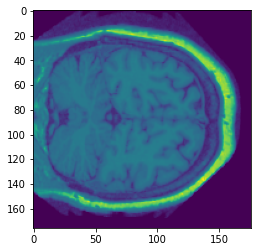

In [6]:
plt.imshow(X_train[1].reshape(176,176))

In [7]:
max(X_train[1]) 
#The value already be normalized
#Normalize the data if the data is not normalized
#X_valid, X_train = X_valid / 255., X_train / 255. 

0.7598039507865906

In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
X_train.dtype

dtype('float64')

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[30976]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

2021-11-23 12:01:33.369493: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[30976]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.layers

In [13]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fd241696e20>>

In [14]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
weights

array([[ 0.00455858, -0.00163419, -0.00407534, ..., -0.00514954,
         0.00718443, -0.01282596],
       [ 0.00088711, -0.00578127, -0.01092213, ...,  0.00112254,
        -0.00514531, -0.00775465],
       [-0.01152257, -0.01284935,  0.01322242, ..., -0.00789026,
         0.01325811, -0.01364933],
       ...,
       [-0.01133312,  0.00190817,  0.00550806, ..., -0.01103346,
        -0.00647212, -0.0041499 ],
       [ 0.00507124,  0.01332383, -0.01285022, ...,  0.00453375,
        -0.0048419 ,  0.01331121],
       [ 0.0039242 , -0.01201581,  0.00334721, ...,  0.00260448,
        -0.00642282, -0.00854408]], dtype=float32)

In [15]:
print(weights.shape)
print(biases.shape)
biases

(30976, 300)
(300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
#Decided to go with Stoichastic Gradient Descent
historysgd = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 1s 46ms/step - loss: 1.5970 - accuracy: 0.4743 - val_loss: 1.1633 - val_accuracy: 0.2869
Epoch 2/30
16/16 [==============================] - 1s 37ms/step - loss: 1.0454 - accuracy: 0.4928 - val_loss: 1.4314 - val_accuracy: 0.1639
Epoch 3/30
16/16 [==============================] - 1s 38ms/step - loss: 1.0818 - accuracy: 0.5359 - val_loss: 1.2712 - val_accuracy: 0.2869
Epoch 4/30
16/16 [==============================] - 1s 38ms/step - loss: 0.9998 - accuracy: 0.5811 - val_loss: 1.5127 - val_accuracy: 0.2869
Epoch 5/30
16/16 [==============================] - 1s 38ms/step - loss: 1.0155 - accuracy: 0.5647 - val_loss: 1.2116 - val_accuracy: 0.5410
Epoch 6/30
16/16 [==============================] - 1s 38ms/step - loss: 0.9962 - accuracy: 0.5647 - val_loss: 1.2093 - val_accuracy: 0.2869
Epoch 7/30
16/16 [==============================] - 1s 38ms/step - loss: 1.0139 - accuracy: 0.5380 - val_loss: 1.1397 - val_accuracy: 0.5410
Epoch 8/30
16

# Problem 2:

###  Try the same neural network for the down sampled Oasis 1 dataset.

In [55]:
DS = 16             # Downsample rate, must be a multiple of 30976.
# You can also try DS=4

N_train = y_train.shape[0]  # The length of the training data
y_train = np.array(y_train)

if 30976/DS % 1 > 0:
    print("Downsample rate is not a multiple of 30976")
    DS = 1
    im_size = 30976
else:
    im_size = int(30976/DS)


data = np.zeros([609, im_size])

for i, file_name in enumerate(labels.Filename):
    img = np.mean(matplotlib.image.imread(file_name),axis=2).reshape(-1)
    data[i,:] = img[::DS]            # Downsample the image

In [56]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(data, y, test_size=0.2, random_state=0)

In [57]:
print(data.shape)
print(X_train1.shape, y_train1.shape)
print(X_test1.shape, y_test1.shape)

(609, 1936)
(487, 1936) (487,)
(122, 1936) (122,)


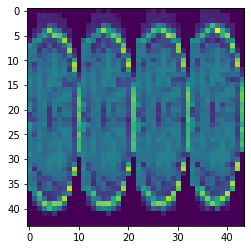

In [11]:
plt.imshow(X_train1[1].reshape(44,44))

In [49]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=[1936]))
model1.add(keras.layers.Dense(300, activation="relu"))
model1.add(keras.layers.Dense(100, activation="relu"))
model1.add(keras.layers.Dense(10, activation="softmax"))

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[1936]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
print(model1.layers)
print(model1.summary)

[<keras.layers.core.flatten.Flatten object at 0x7fb3f04a5e20>, <keras.layers.core.dense.Dense object at 0x7fb3f04b1280>, <keras.layers.core.dense.Dense object at 0x7fb3f04b14f0>, <keras.layers.core.dense.Dense object at 0x7fb3f04b18e0>]
<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fb3f04a8f70>>


In [50]:
hidden11 = model1.layers[1]
weights1, biases1 = hidden11.get_weights()
weights1

array([[ 0.01704903, -0.00611184, -0.01524172, ..., -0.0192592 ,
         0.02686964, -0.04796888],
       [ 0.00331777, -0.02162187, -0.04084859, ...,  0.00419827,
        -0.01924339, -0.02900225],
       [-0.04309423, -0.04805638,  0.04945162, ..., -0.02950943,
         0.04958511, -0.05104826],
       ...,
       [ 0.0123988 , -0.01498482, -0.04120352, ...,  0.02418825,
         0.01021894,  0.01348232],
       [ 0.00468966, -0.01223113, -0.0240629 , ...,  0.04875263,
        -0.02289778,  0.02700316],
       [-0.00498009,  0.03607713,  0.04675157, ...,  0.01949016,
         0.02020126, -0.0209934 ]], dtype=float32)

In [52]:
print(weights1.shape,biases1.shape)
biases1

(1936, 300) (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [61]:
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
#Decided to go with Stoichastic Gradient Descent
historysgd1 = model1.fit(X_train1, y_train1, epochs=29,
                    validation_data=(X_test1, y_test1))

Epoch 1/29
16/16 [==============================] - 0s 11ms/step - loss: 0.9699 - accuracy: 0.5791 - val_loss: 1.0466 - val_accuracy: 0.5410
Epoch 2/29
16/16 [==============================] - 0s 5ms/step - loss: 0.9817 - accuracy: 0.5708 - val_loss: 1.0741 - val_accuracy: 0.5082
Epoch 3/29
16/16 [==============================] - 0s 4ms/step - loss: 0.9869 - accuracy: 0.5729 - val_loss: 1.0960 - val_accuracy: 0.5410
Epoch 4/29
16/16 [==============================] - 0s 4ms/step - loss: 0.9714 - accuracy: 0.5852 - val_loss: 1.2895 - val_accuracy: 0.2869
Epoch 5/29
16/16 [==============================] - 0s 5ms/step - loss: 0.9831 - accuracy: 0.5667 - val_loss: 1.0742 - val_accuracy: 0.5410
Epoch 6/29
16/16 [==============================] - 0s 6ms/step - loss: 0.9707 - accuracy: 0.5791 - val_loss: 1.1107 - val_accuracy: 0.3770
Epoch 7/29
16/16 [==============================] - 0s 6ms/step - loss: 0.9850 - accuracy: 0.5503 - val_loss: 1.0877 - val_accuracy: 0.5410
Epoch 8/29
16/16 [=